In [1]:
% matplotlib inline
import json 
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D



This tutorial requires the JSON library and Matplotlib library. The JSON library should be a default package in Python 2.6 and greater. 

The Matplotlib library is also required. This can be installed via pip with the command [*pip install matplotlib*].


Loading JSON Output from *KnockoutSimulations.py*

In [2]:
json_data = open('knockouts.json')
knockout_data = json.load(json_data)

The JSON output is loaded as a nested dictionary. The highest level of keys correspond to the specified Knockout target nodes in *knockouts.json*

In [3]:
knockout_data.keys()

dict_keys(['ABA', 'pHc', 'PC', 'WT', 'RBOH', 'OST1'])

For each target Node:

* There is a dictionary:
    * Key *'Closure AUC'* contains the AUC (area under the curve) value for the Closure Node
    * Key *'TimeSteps'* is a dictionary containing the percentage of Closure at each timestep
 

In [4]:
# Data for knockout Target 'WT'
knockout_data['WT']

{'Closure AUC': 23.9876,
 'Timesteps': {'Closure': [0.0,
   0.0004,
   0.0016,
   0.0236,
   0.108,
   0.2676,
   0.468,
   0.6508,
   0.7776,
   0.8684,
   0.9228,
   0.9508,
   0.9752,
   0.9868,
   0.9944,
   0.996,
   0.9968,
   0.9988,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0]}}

In [5]:
# AUC for knockout Target 'WT'
knockout_data['WT']['Closure AUC']

23.9876

In [6]:
# Timeseries information for knockout target 'WT'
knockout_data['WT']['Timesteps']['Closure']

[0.0,
 0.0004,
 0.0016,
 0.0236,
 0.108,
 0.2676,
 0.468,
 0.6508,
 0.7776,
 0.8684,
 0.9228,
 0.9508,
 0.9752,
 0.9868,
 0.9944,
 0.996,
 0.9968,
 0.9988,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

This is an example plotting function for plotting percent Closure per timestep:

In [7]:
def make_plot( knockout_data, knockouts):
    
    """
    :param knockout_data: The KnockoutSimulations.py JSON Output loaded with the JSON module

    :param knockout: A list of knockout targets to plot

    :return knockout_plot.png: The knockout plot as a png file.
    """
    # List all potential Matplotlib Markers
    markers = list(Line2D.markers.keys())
    # Remove Pixel Markers. Too small to notice
    markers.remove(',')
    # Pull required amount of markers
    markers = markers[:len(knockouts)]
    # Map marker to gene
    knockout_mark = list(zip(knockouts, markers))
    # Plots the effect of Knockout on Closure
    plt.figure(figsize=(12,9))
    coll = []
    
    # Iterate through each knockout
    # Pull timeseries from data
    # plot with marker
    for target in knockout_mark:
        timeseries = knockout_data[target[0]]['Timesteps']['Closure']
        p = plt.plot( timeseries, linestyle='-', marker=target[1])
        coll.append( p )

    plt.legend(knockouts, loc='best' )
    plt.title( 'Effect of mutations on Closure' )
    plt.xlabel( 'Time Steps' )
    plt.ylabel( 'Percent' )
    plt.ylim( (0, 1.1) )
    plt.savefig("knockout_plot.png")
    plt.show()

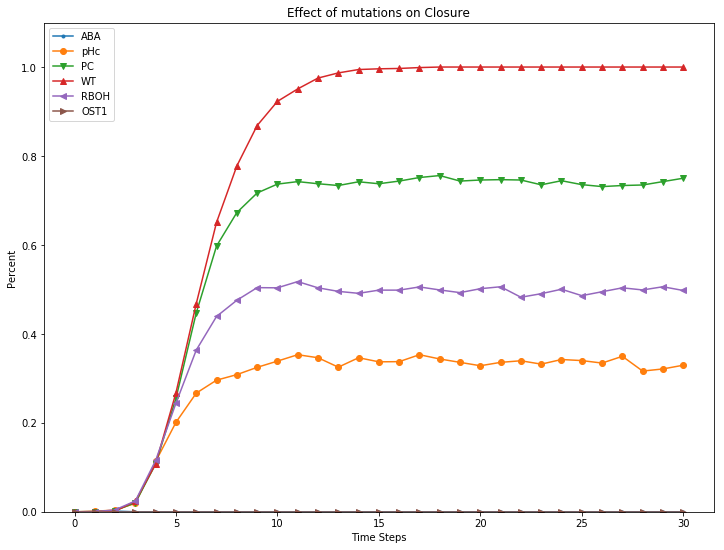

In [8]:
make_plot(knockout_data, knockouts= knockout_data.keys() )